# IPython Notebook
the actual data structure of an ipynb is just... json.

## Metadata
<div style="display: inline-block">
<!-- get the table rendered to the left rather than default center, the spaces after the raw html are important for markdown https://stackoverflow.com/a/78525025 -->

| Key | Value |
| :--- | :--- |
| author | [Chris Carl](mailto:chrisbcarl@outlook.com) |
| date | 2025-12-20 |
| dataset | na.csv © 2024 Chris Carl |
| url | https://chriscarl.com |

<!-- get the table rendered to the left rather than default center, the spaces after the raw html are important for markdown https://stackoverflow.com/a/78525025 -->
</div>

## Changelog
- 2025-01-24 - jupyter.ipynb.ipynb - FEATURE: ipynb-matplotlib-widgets
- 2024-12-20 - jupyter.ipynb.ipynb - initial commit

## TOC (Raw HTML Anchors)
* [Setup](#Setup)
* [IPython Notebooks are Just JSON](#just-json)
* [VS Code Shortcuts](#shortcuts)

## LaTeX
$LaTeX$ support available

# Setup <a id="Setup"></a>

In [13]:
# setup
import __main__
import os
import sys
import pprint
import importlib
SCRIPT_DIRPATH = %pwd  # %pwd is a "magic" command  https://ipython.readthedocs.io/en/stable/interactive/magics.html
SCRIPT_FILEPATH = None
SCRIPT_FILENAME = None
if hasattr(__main__, '__vsc_ipynb_file__'):  # vscode
    SCRIPT_FILEPATH = __main__.__vsc_ipynb_file__
elif hasattr(__main__, '__session__'):  # localhost:8888/notebooks
    SCRIPT_FILEPATH = __main__.__session__
if SCRIPT_FILEPATH:
    SCRIPT_FILENAME = os.path.splitext(os.path.basename(SCRIPT_FILEPATH))[0]
pprint.pprint(dict(dir=SCRIPT_DIRPATH, fp=SCRIPT_FILEPATH, fn=SCRIPT_FILENAME), indent=2)

requirements = ['pandas', 'numpy', 'seaborn', 'requests', 'ipympl']
install_string = ' '.join(requirements)
try:
    for requirement in requirements:
        importlib.import_module(requirement)
except ImportError:
    print(f'pip install {install_string}', file=sys.stderr)
    %pip install {install_string}

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4, edgeitems=2, linewidth=9999)  # threshold=4,

pd.set_option('display.precision', 4)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)  # .describe has 9
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # prevents wrapping when colwidth exceeds width

with pd.option_context('display.max_rows', 9, 'display.max_columns', 32):
    pass

if sys.platform == 'win32':
    res = !where.exe shitlatex
    latex_exists = res[0].startswith('INFO')
else:
    res = !which latex
    latex_exists = bool(res)
plt.rcParams.update({'text.usetex': latex_exists})  # , 'font.family': 'Helvetica'  # requires latex installed


# command to tell the notebook to plt.show() IN THE NOTEBOOK, otherwise you call plt.show()
%matplotlib inline
# command to tell the notebook to render interactable matplotlib, requires pip install ipympl
# FEATURE: ipynb-matplotlib-widgets
# this is only really usefull when doing ipynb + 3d. otherwise, eh
# %matplotlib widget

# run shell commands like installing packages and other wild stuff
!echo hello ipynb
# change cli arguments with variables
!jupyter nbconvert --to html --template lab {SCRIPT_FILEPATH}
!jupyter nbconvert --to python --no-prompt {SCRIPT_FILEPATH}
# !jupyter nbconvert --execute --to notebook --inplace {SCRIPT_FILEPATH}
# !pip install matplotlib

5;  # normally the 5 would be printed, adding ; disables the print

# keyboard shortcuts
# 1. Shift + Enter - exec current cell
# 2. Ctrl + Enter - exec the current cell and stay
# 3. Enter - edit mode
# 4. Y - change cell type to code
# 5. M - change the cell type to markdown
# 6. A - insert above current
# 7. B - insert below current

{ 'dir': 'c:\\Users\\chris\\src\\bootstrap\\jupyter',
  'fn': 'ipynb',
  'fp': 'c:\\Users\\chris\\src\\bootstrap\\jupyter\\ipynb.ipynb'}
hello ipynb


[NbConvertApp] Converting notebook c:\Users\chris\src\bootstrap\jupyter\ipynb.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 415671 bytes to c:\Users\chris\src\bootstrap\jupyter\ipynb.html
[NbConvertApp] Converting notebook c:\Users\chris\src\bootstrap\jupyter\ipynb.ipynb to python
[NbConvertApp] Writing 5580 bytes to c:\Users\chris\src\bootstrap\jupyter\ipynb.py


# IPython Notebooks are Just JSON <a id="just-json"></a>

In [14]:
import json
with open(SCRIPT_FILEPATH, 'r', encoding='utf-8') as r:
    body = json.load(r)
    print(json.dumps(body['cells'][0], indent=2))
    print(json.dumps(body['cells'][1], indent=2))

{
  "cell_type": "markdown",
  "metadata": {},
  "source": [
    "# IPython Notebook\n",
    "the actual data structure of an ipynb is just... json.\n",
    "\n",
    "## Metadata\n",
    "<div style=\"display: inline-block\">\n",
    "<!-- get the table rendered to the left rather than default center, the spaces after the raw html are important for markdown https://stackoverflow.com/a/78525025 -->\n",
    "\n",
    "| Key | Value |\n",
    "| :--- | :--- |\n",
    "| author | [Chris Carl](mailto:chrisbcarl@outlook.com) |\n",
    "| date | 2025-12-20 |\n",
    "| dataset | na.csv \u00a9 2024 Chris Carl |\n",
    "| url | https://chriscarl.com |\n",
    "\n",
    "<!-- get the table rendered to the left rather than default center, the spaces after the raw html are important for markdown https://stackoverflow.com/a/78525025 -->\n",
    "</div>\n",
    "\n",
    "## Changelog\n",
    "- 2025-01-24 - jupyter.ipynb.ipynb - FEATURE: ipynb-matplotlib-widgets\n",
    "- 2024-12-20 - jupyter.ip

# VS Code Keyboard Shortcuts <a id="shortcuts"></a>
[VS Code Keyboard Shortcuts](https://blog.chaitanyashahare.com/posts/vscode-jupyter-notebooks-keyboard-shortcuts/)
1. Shift + Enter - exec current cell
2. Ctrl + Enter - exec the current cell and stay
3. Enter - edit mode
4. Y - change cell type to code
5. M - change the cell type to markdown
6. A - insert above current
7. B - insert below current


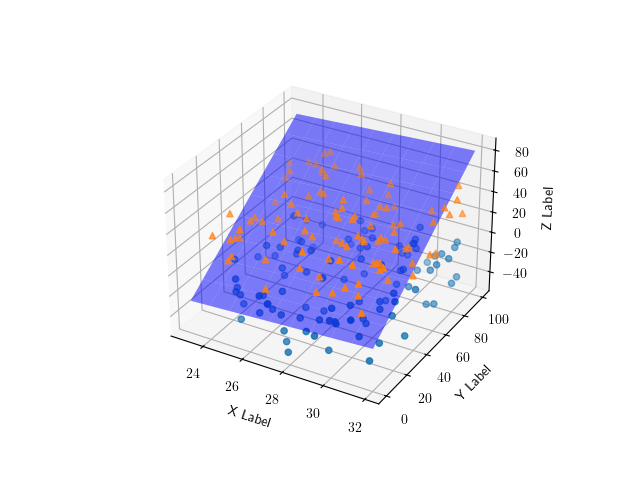

In [15]:

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -5), ('^', 50, 5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

xx, yy = np.meshgrid(np.linspace(23, 32, 10), np.linspace(0, 100, 10))
a, b, c = -50, 1, 1
zz = a + b * xx + c * yy
ax.plot_surface(xx, yy, zz, color='blue', alpha=0.5)  # 2d plane

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()